In [104]:
"""
Author: Ryan Quirk, Huntley Hedrick, Matthew Griffith
Files: Analysis.ipynb, soccer_data.xlsx
Project Description: 
"""

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_excel("soccer_data.xlsx") 

# First visualization shows the average number of goals per age ranges
# Age ranges are >20, 20-24, 25-29, 30+


age_count = {}
b20 = []
b25 = []
b30 = []
b35 = []
a35 = []

for index, row in df.iterrows():
    age = row["Age"]
    goals = row["Goals"]

    if age in age_count.keys():
        age_count.update({age: age_count[age] + 1})
    else:
        age_count.update({age: 1})

    if age < 20:
        b20.append(goals)
        continue
    elif age < 25:
        b25.append(goals)
        continue
    elif age < 30:
        b30.append(goals)
        continue
    elif age < 35:
        b35.append(goals)
        continue
    else:
        a35.append(goals)

ranges = [">20", "20-24", "25-29", "30-34", "35+"]
values = [sum(b20)/len(b20), sum(b25)/len(b25), sum(b30)/len(b30), sum(b35)/len(b35), sum(a35)/len(a35) ]


### The Code Above:

Calculates the values for the plots below. It does this by iterating through the dataset and tallying each player that has a certain age. While iterating, it also checks for which age range the player belongs in and adds their goals to that age range. Finally with the goal values populated per each age range, create a list of the average goals per age range.

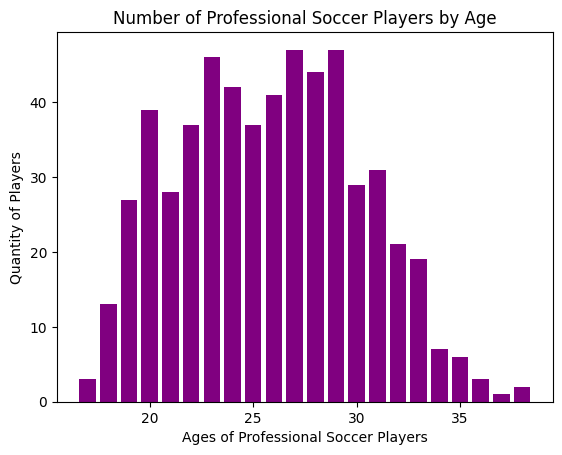

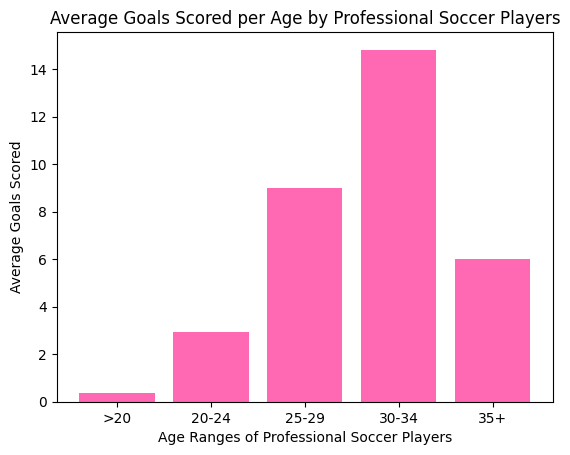

In [105]:
# Quantity of players sorted by age
plt.bar(age_count.keys(), age_count.values(), color="purple")
plt.xlabel("Ages of Professional Soccer Players")
plt.ylabel("Quantity of Players")
plt.title("Number of Professional Soccer Players by Age")
plt.show()


# Average Number of Goals Scored per Age Range
plt.bar(ranges, values, color="hotpink")
plt.xlabel("Age Ranges of Professional Soccer Players")
plt.ylabel("Average Goals Scored")
plt.title("Average Goals Scored per Age by Professional Soccer Players")
plt.show()


### Analysis

Interesting insight can be seen from the graphs above. The first graph showing that the average age of professional soccer players around 25 years old with outliers in the population lingering above 35. Furthermore the second graph shows that older players score higher goals on average with the range 30-34 scoring the highest.

In [106]:
print(df)

df_midfi = df[df['Position'] == 'Midfielder']
df_gk = df[df['Position'] == 'Goalkeeper']
df_def = df[df['Position'] == 'Midfielder']
df_frd = df[df['Position'] == 'Forward']


                       Name  Jersey Number                     Club  \
0                Bernd Leno            1.0                  Arsenal   
1                Matt Macey           33.0                  Arsenal   
2    RÃºnar Alex RÃºnarsson           13.0                  Arsenal   
3         HÃ©ctor BellerÃ­n            2.0                  Arsenal   
4            Kieran Tierney            3.0                  Arsenal   
..                      ...            ...                      ...   
566              Pedro Neto            7.0  Wolverhampton-Wanderers   
567          RaÃºl JimÃ©nez            9.0  Wolverhampton-Wanderers   
568           Adama TraorÃ©           37.0  Wolverhampton-Wanderers   
569            FÃ¡bio Silva           17.0  Wolverhampton-Wanderers   
570        Leonardo Campana           30.0  Wolverhampton-Wanderers   

       Position Nationality   Age  Appearances  Wins  Losses  Goals  ...  \
0    Goalkeeper     Germany  28.0           64    28      16      0  ..

In [107]:
pos_map = {
    'Goalkeeper': 1,
    'Defender': 2,
    'Midfielder': 3,
    'Forward': 4
}

df['Position'] = df['Position'].str.strip().str.title()

# Apply mapping
df['Position_Numeric'] = df['Position'].map(pos_map)

# Check for unmapped positions
unmapped_positions = df[df['Position_Numeric'].isnull()]['Position'].unique()
if len(unmapped_positions) > 0:
    print("Unmapped Positions Found:", unmapped_positions)

# Correct unmapped positions manually (example for typos or alternative spellings)
# You can expand the pos_map or directly fix values in the dataset
# Example:
# df['Position'] = df['Position'].replace({'Mid Fielder': 'Midfielder'})

# After ensuring no NaN values, calculate correlation coefficient
if df['Position_Numeric'].isnull().any():
    print("Fix unmapped positions before calculating correlation.")
else:
    corr = np.corrcoef(df['Position_Numeric'], df['Goals'])[0, 1]
    print("Correlation Coefficient between Position and Goals:", corr)

print(df)

Correlation Coefficient between Position and Goals: 0.3895369156093649
                       Name  Jersey Number                     Club  \
0                Bernd Leno            1.0                  Arsenal   
1                Matt Macey           33.0                  Arsenal   
2    RÃºnar Alex RÃºnarsson           13.0                  Arsenal   
3         HÃ©ctor BellerÃ­n            2.0                  Arsenal   
4            Kieran Tierney            3.0                  Arsenal   
..                      ...            ...                      ...   
566              Pedro Neto            7.0  Wolverhampton-Wanderers   
567          RaÃºl JimÃ©nez            9.0  Wolverhampton-Wanderers   
568           Adama TraorÃ©           37.0  Wolverhampton-Wanderers   
569            FÃ¡bio Silva           17.0  Wolverhampton-Wanderers   
570        Leonardo Campana           30.0  Wolverhampton-Wanderers   

       Position Nationality   Age  Appearances  Wins  Losses  Goals  ...  \


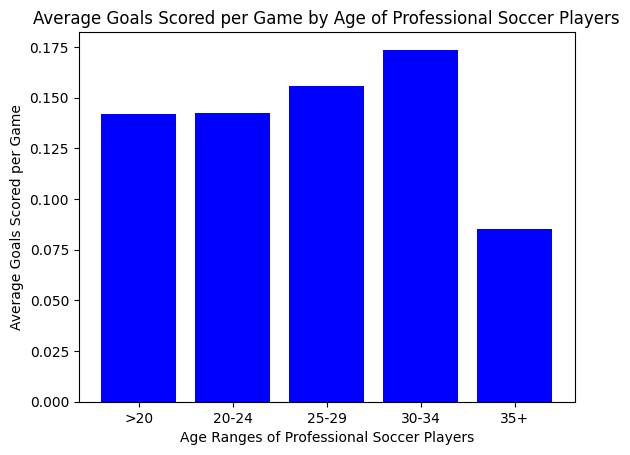

In [20]:
# Initialize dictionaries and lists
new_age_count = {}
nb20, nb25, nb30, nb35, na35 = [], [], [], [], []

for index, row in df.iterrows():
    age = row["Age"]
    goals = row["Goals per match"]
    goalCheck = row["Goals"]

    # Skip rows with missing or invalid values
    if pd.isnull(goals) or goals > 0.99:
        continue

    # Update age count
    if age in new_age_count:
        new_age_count[age] += 1
    else:
        new_age_count[age] = 1

    # Categorize goals based on age range
    if goalCheck > 0:
        if age < 20:
            nb20.append(goals)
        elif age < 25:
            nb25.append(goals)
        elif age < 30:
            nb30.append(goals)
        elif age < 35:
            nb35.append(goals)
        else:
            na35.append(goals)

# Compute averages safely
new_ranges = [">20", "20-24", "25-29", "30-34", "35+"]
new_values = [
    sum(nb20) / len(nb20) if nb20 else 0,
    sum(nb25) / len(nb25) if nb25 else 0,
    sum(nb30) / len(nb30) if nb30 else 0,
    sum(nb35) / len(nb35) if nb35 else 0,
    sum(na35) / len(na35) if na35 else 0,
]

# Plot the results
plt.bar(new_ranges, new_values, color="blue")
plt.xlabel("Age Ranges of Professional Soccer Players")
plt.ylabel("Average Goals Scored per Game")
plt.title("Average Goals Scored per Game by Age of Professional Soccer Players")
plt.show()


In [108]:
df_cleaned = df[df['Appearances'] > 0]

pos_map = {
    'Goalkeeper': 1,
    'Defender': 2,
    'Midfielder': 3,
    'Forward': 4
}

df_cleaned['Position'] = df_cleaned['Position'].str.strip().str.title()

# Apply mapping
df_cleaned['Position_Numeric'] = df_cleaned['Position'].map(pos_map)

# Check for unmapped positions
unmapped_positions = df_cleaned[df_cleaned['Position_Numeric'].isnull()]['Position'].unique()
if len(unmapped_positions) > 0:
    print("Unmapped Positions Found:", unmapped_positions)

# Correct unmapped positions manually (example for typos or alternative spellings)
# You can expand the pos_map or directly fix values in the dataset
# Example:
# df['Position'] = df['Position'].replace({'Mid Fielder': 'Midfielder'})

# After ensuring no NaN values, calculate correlation coefficient
if df_cleaned['Position_Numeric'].isnull().any():
    print("Fix unmapped positions before calculating correlation.")
else:
    corr = np.corrcoef(df_cleaned['Position_Numeric'], df_cleaned['Goals'])[0, 1]
    print("Correlation Coefficient between Position and Goals:", corr)
    # corr = np.corrcoef(df_cleaned['Po'])

Correlation Coefficient between Position and Goals: 0.3984861901342884


C:\Users\mg416\AppData\Local\Temp\ipykernel_11116\84834905.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Position'] = df_cleaned['Position'].str.strip().str.title()
C:\Users\mg416\AppData\Local\Temp\ipykernel_11116\84834905.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Position_Numeric'] = df_cleaned['Position'].map(pos_map)


In [109]:
corr = np.corrcoef(df_cleaned['Assists'], df_cleaned['Goals'])[0, 1]
print(corr)

0.7098651916046181


In [110]:
df_x = df_cleaned.dropna(subset=['Big chances created', 'Passes'])

corr = np.corrcoef(df_x['Big chances created'], df_x['Passes'])[0, 1]
print(corr)

0.5851499788886997


In [111]:
df_x = df_cleaned.dropna(subset=['Passes per match', 'Passes'])

corr = np.corrcoef(df_x['Passes per match'], df_x['Passes'])[0, 1]
print(corr)

0.4481595825407343


In [112]:
df_x = df_cleaned.dropna(subset=['Through balls', 'Passes'])

corr = np.corrcoef(df_x['Through balls'], df_x['Passes'])[0, 1]
print(corr)

0.6203058536005208


In [113]:
df_x = df_cleaned.dropna(subset=['Shots', 'Shots on target'])

corr = np.corrcoef(df_x['Shots'], df_x['Shots on target'])[0, 1]
print(corr)

0.9833598067946157


In [114]:
df_x = df_cleaned.dropna(subset=['Goals', 'Shots on target'])

corr = np.corrcoef(df_x['Goals'], df_x['Shots on target'])[0, 1]
print(corr)

0.9684761178430327


In [115]:
df_x = df_cleaned.dropna(subset=['Headed Clearance'])

corr = np.corrcoef(df_x['Position_Numeric'], df_x['Offsides'])[0, 1]
print(corr)

0.41349773747282714


In [116]:
df_x = df_def.dropna(subset=['Clean sheets', 'Wins'])

corr = np.corrcoef(df_x['Clean sheets'], df_x['Wins'])[0, 1]
print(corr)

1.0


In [117]:
df_x = df_def.dropna(subset=['Clean sheets', 'Tackles'])

corr = np.corrcoef(df_x['Clean sheets'], df_x['Tackles'])[0, 1]
print(corr)

1.0


In [118]:
df_x = df_def.dropna(subset=['Tackles', 'Wins'])

corr = np.corrcoef(df_x['Tackles'], df_x['Wins'])[0, 1]
print(corr)

0.8492318732337522


In [119]:
df_x = df_def.dropna(subset=['Tackles', 'Wins'])

corr = np.corrcoef(df_x['Tackles'], df_x['Wins'])[0, 1]
print(corr)

0.8492318732337522


In [120]:
df_x = df_cleaned.dropna(subset=['Headed goals'])

corr = np.corrcoef(df_x['Position_Numeric'], df_x['Headed goals'])[0, 1]
print(corr)

0.22079117079588614


In [121]:
df_x = df_cleaned.dropna(subset=['Wins', 'Passes'])

corr = np.corrcoef(df_x['Wins'], df_x['Passes'])[0, 1]
print(corr)

0.8845145271959641


In [122]:
df_x = df_cleaned.dropna(subset=['Wins', 'Goals'])

corr = np.corrcoef(df_x['Wins'], df_x['Goals'])[0, 1]
print(corr)

0.5824852501886896


In [123]:
df_x = df_cleaned.dropna(subset=['Wins', 'Goals per match'])

corr = np.corrcoef(df_x['Wins'], df_x['Goals per match'])[0, 1]
print(corr)

-0.18015583963728976


In [124]:
df_x = df_cleaned.dropna(subset=['Wins', 'Big chances missed'])

corr = np.corrcoef(df_x['Wins'], df_x['Big chances missed'])[0, 1]
print(corr)

0.6410457311893933


In [125]:
df_x = df_cleaned.dropna(subset=['Losses', 'Big chances missed'])

corr = np.corrcoef(df_x['Losses'], df_x['Big chances missed'])[0, 1]
print(corr)

0.4636959984658156


In [126]:
df_x = df_cleaned.dropna(subset=['Wins', 'Duels won'])

corr = np.corrcoef(df_x['Wins'], df_x['Duels won'])[0, 1]
print(corr)

0.890257515129475


In [127]:
df_x = df_cleaned.dropna(subset=['Wins', 'Successful 50/50s'])

corr = np.corrcoef(df_x['Wins'], df_x['Successful 50/50s'])[0, 1]
print(corr)

0.6501530232754872


In [128]:
df_x = df_cleaned.dropna(subset=['Wins', 'Passes per match'])

corr = np.corrcoef(df_x['Wins'], df_x['Passes per match'])[0, 1]
print(corr)

0.24397220039314416


In [129]:
df_x = df_cleaned.dropna(subset=['Wins', 'Big chances created'])

corr = np.corrcoef(df_x['Wins'], df_x['Big chances created'])[0, 1]
print(corr)

0.7222924441158723


In [130]:
df_x = df_cleaned.dropna(subset=['Wins', 'Crosses'])

corr = np.corrcoef(df_x['Wins'], df_x['Crosses'])[0, 1]
print(corr)

0.6121175356216341


In [131]:
df_x = df_cleaned.dropna(subset=['Wins', 'Through balls'])

corr = np.corrcoef(df_x['Wins'], df_x['Through balls'])[0, 1]
print(corr)

0.6418532283667776
